In [76]:
import matplotlib.pyplot as plt
import json
from pennylane import numpy as np

In [77]:
with open('exp_runs/simplified2design_4layers.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    s2design = json.loads(data)

with open('exp_runs/kupccgsd_2layers.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    kUpCCGSD_2k = json.loads(data)

with open('exp_runs/h2_fci.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    fci_h2 = json.loads(data)    

with open('exp_runs/meta_simples_doubles.json', 'r') as reader:
    # Read & print the entire file
    data = reader.read()
    double_ex = json.loads(data)      




test_points=fci_h2["points"]
fci_energies = fci_h2["energies"]


<function matplotlib.pyplot.show(close=None, block=None)>

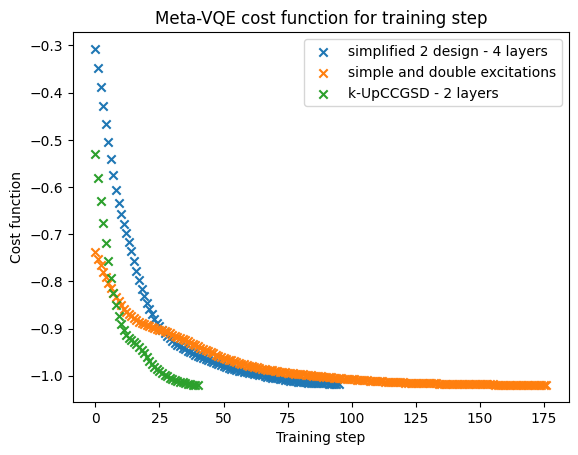

In [82]:
# Plot for meta energies
plt.scatter([i for i in range(len(s2design["results"]["adam"]["energies"][-1]))],s2design["results"]["adam"]["energies"][-1], label="simplified 2 design - 4 layers", marker='x')
plt.scatter([i for i in range(len(double_ex["results"]["adam"]["energies"][-1]))],double_ex["results"]["adam"]["energies"][-1], label="simple and double excitations", marker='x')
plt.scatter([i for i in range(len(kUpCCGSD_2k["results"]["adam"]["energies"][-1]))],kUpCCGSD_2k["results"]["adam"]["energies"][-1], label="k-UpCCGSD - 2 layers", marker='x')

plt.legend()
plt.title('Meta-VQE cost function for training step')
plt.ylabel('Cost function')
plt.xlabel('Training step')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

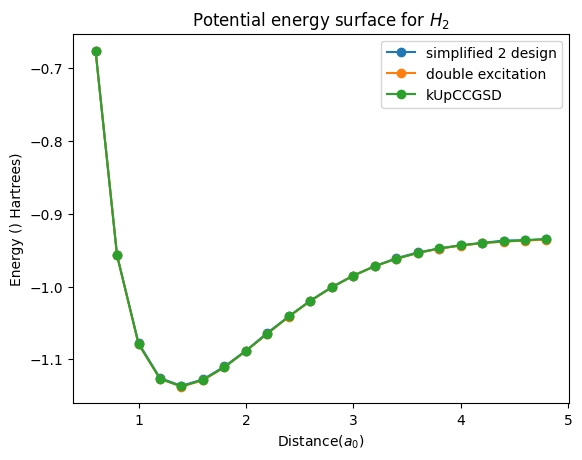

In [79]:
# PES plot
plt.plot(test_points,s2design["opt_meta"], label="simplified 2 design", marker='o')
plt.plot(test_points,double_ex["opt_meta"], label="double excitation", marker='o')
plt.plot(test_points,kUpCCGSD_2k["opt_meta"], label="kUpCCGSD", marker='o')

plt.legend()
plt.title('Potential energy surface for $H_{2}$')
plt.ylabel('Energy () Hartrees)')
plt.xlabel('Distance($a_{0}$)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

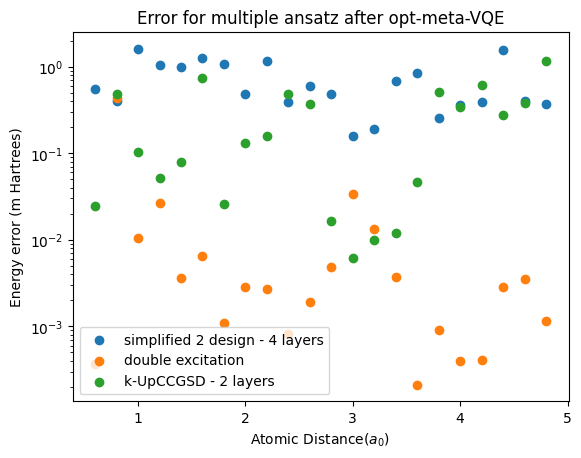

In [84]:
# Plot for errors
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(s2design["opt_meta"] ,fci_energies)], label="simplified 2 design - 4 layers", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(double_ex["opt_meta"] ,fci_energies)], label="double excitation", marker='o')
plt.scatter(test_points,[np.abs(i-j)*1000 for i,j in zip(kUpCCGSD_2k["opt_meta"] ,fci_energies)], label="k-UpCCGSD - 2 layers", marker='o')

plt.legend()
plt.title('Error for multiple ansatz after opt-meta-VQE')
plt.yscale('log',base=10) 
plt.ylabel('Energy error (m Hartrees)')
plt.xlabel('Atomic Distance($a_{0}$)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

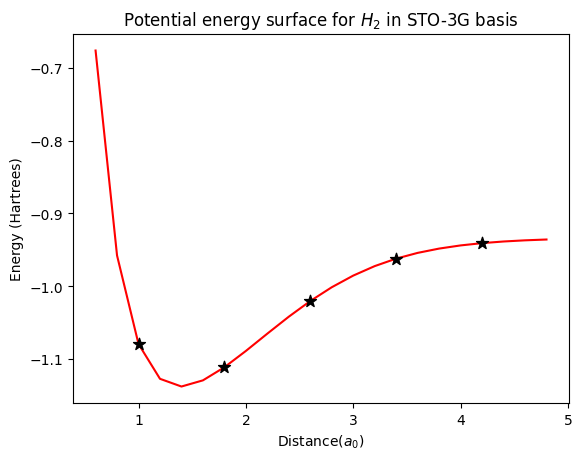

In [81]:
# Meta VQE description plot
train_points_indexes = [2,6,10,14,18]

plt.plot(test_points,fci_energies, color="r")
plt.scatter([test_points[i] for i in train_points_indexes], [fci_energies[i] for i in train_points_indexes], zorder=99, label="Train Points", marker='*', color="black", s=80)

plt.title('Potential energy surface for $H_{2}$ in STO-3G basis')
plt.ylabel('Energy (Hartrees)')
plt.xlabel('Distance($a_{0}$)')
plt.show